<a href="https://colab.research.google.com/github/yiwenwangANU/pytorch_review/blob/main/02_Binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Preparing

In [1]:
from sklearn.datasets import make_circles
# Reference: https://scikit-learn.org/dev/modules/generated/sklearn.datasets.make_circles.html

n_examples = 1000
X, y = make_circles(n_examples, noise=0.03, random_state=42)

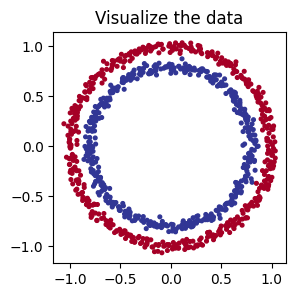

In [2]:
# Visualize the data
import matplotlib.pyplot as plt
plt.figure(figsize=(3,3))
plt.title('Visualize the data')
plt.scatter(X[:, 0], X[:, 1], c=y, s=7,cmap=plt.cm.RdYlBu)
plt.show()

In [3]:
# Turn numpy data into tensors
import torch
X, y = torch.from_numpy(X).type(torch.float), torch.from_numpy(y).type(torch.float)

In [4]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [5]:
# Check the data
X_train[:5], X_train.dtype, len(X_train)

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 torch.float32,
 800)

In [6]:
y_train[:5], y_train.dtype, len(y_train)

(tensor([1., 0., 0., 0., 1.]), torch.float32, 800)

## Set up GPU

In [7]:
# need to switch to GPU in colab first if wants GPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [8]:
# put data set onto device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

## Build the model

In [9]:
from torch import nn
class CircleModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(in_features=2, out_features=10)
    self.layer2 = nn.Linear(in_features=10, out_features=10)
    self.layer3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU()

  def forward(self, x):
    z = self.relu(self.layer1(x))
    z = self.relu(self.layer2(z))
    z = self.layer3(z)
    return z

model = CircleModel().to(device)
model

CircleModel(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [10]:
# use binart cross entropy loss for binary classification
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=.1)

## Create helper function to calculate accuracy

In [11]:
def accuracy_fn(y_pred, y_true):
  correct = torch.eq(y_pred, y_true).sum().item()
  acc = correct/len(y_pred)*100
  return acc

## Train the model

In [12]:
epoches = 3000

for epoch in range(epoches):
  model.train()
  y_logit = model(X_train).squeeze()
  loss = loss_fn(y_logit, y_train)
  y_pred = torch.round(torch.sigmoid(y_logit))
  accuracy = accuracy_fn(y_pred=y_pred, y_true=y_train)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model.eval()
  with torch.inference_mode():
    if(epoch % 300 == 0):
      test_logit = model(X_test).squeeze()
      test_loss = loss_fn(test_logit, y_test)
      test_pred = torch.round(torch.sigmoid(test_logit))
      test_acc = accuracy_fn(y_pred=test_pred, y_true=y_test)
      print(f'epoch: {epoch}, loss: {loss:.2f}, accuracy: {accuracy:.2f}, test loss: {test_loss:.2f}, test accuracy: {test_acc:.2f}')

epoch: 0, loss: 0.71, accuracy: 50.00, test loss: 0.71, test accuracy: 50.00
epoch: 300, loss: 0.69, accuracy: 51.88, test loss: 0.69, test accuracy: 56.00
epoch: 600, loss: 0.69, accuracy: 54.87, test loss: 0.69, test accuracy: 59.00
epoch: 900, loss: 0.67, accuracy: 64.00, test loss: 0.68, test accuracy: 63.50
epoch: 1200, loss: 0.59, accuracy: 87.00, test loss: 0.61, test accuracy: 83.50
epoch: 1500, loss: 0.25, accuracy: 99.75, test loss: 0.28, test accuracy: 98.00
epoch: 1800, loss: 0.06, accuracy: 100.00, test loss: 0.09, test accuracy: 100.00
epoch: 2100, loss: 0.03, accuracy: 100.00, test loss: 0.05, test accuracy: 100.00
epoch: 2400, loss: 0.02, accuracy: 100.00, test loss: 0.04, test accuracy: 100.00
epoch: 2700, loss: 0.01, accuracy: 100.00, test loss: 0.03, test accuracy: 100.00


## Visualize data by downloading helper function from github

In [13]:
from pathlib import Path
if(Path('helper_functions.py').is_file()):
  print('helper functions already exist!')
else:
  !wget https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py

--2024-12-01 23:59:25--  https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10160 (9.9K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]   9.92K  --.-KB/s    in 0s      

2024-12-01 23:59:26 (82.7 MB/s) - ‘helper_functions.py’ saved [10160/10160]



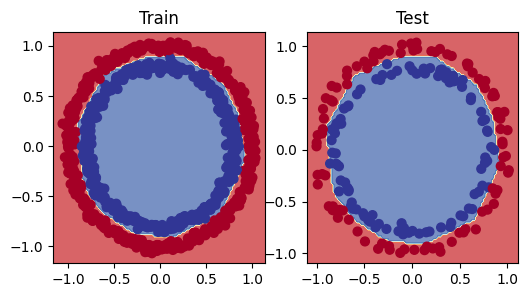

In [14]:
from helper_functions import plot_decision_boundary
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model, X_test, y_test)
plt.show()